In [1]:
%pylab inline
import numpy as np
from sklearn import neighbors
from sklearn.cluster import KMeans
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
TRAIN_TEST_RATIO = 4

## Get data

In [3]:

people_data = genfromtxt('people.txt',delimiter = ',')
item_data = genfromtxt('item.txt',delimiter = ',')
none_data = genfromtxt('none.txt',delimiter = ',')
data = np.concatenate((people_data,item_data,none_data),axis=0)
label = np.array([2] * len(people_data) + [1] * len(item_data) + [0] * len(none_data))
data[data>100] = 100

## Normalize data

In [4]:
#normalize the data
ftsclr=StandardScaler()
data = ftsclr.fit_transform(data)


## Get T-SNE data

In [5]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
data_tsne = tsne.fit_transform(data)

## Get training and test dataset

In [6]:
people_test = data[label==2][:len(people_data)//TRAIN_TEST_RATIO]
people_train = data[label==2][len(people_data)//TRAIN_TEST_RATIO:]
item_test = data[label==1][:len(item_data)//TRAIN_TEST_RATIO]
item_train = data[label==1][len(item_data)//TRAIN_TEST_RATIO:]
none_test = data[label==0][:len(none_data)//TRAIN_TEST_RATIO]
none_train = data[label==0][len(none_data)//TRAIN_TEST_RATIO:]

tsne_people_test = data_tsne[label==2][:len(people_data)//TRAIN_TEST_RATIO]
tsne_people_train = data_tsne[label==2][len(people_data)//TRAIN_TEST_RATIO:]
tsne_item_test = data_tsne[label==1][:len(item_data)//TRAIN_TEST_RATIO]
tsne_item_train = data_tsne[label==1][len(item_data)//TRAIN_TEST_RATIO:]
tsne_none_test = data_tsne[label==0][:len(none_data)//TRAIN_TEST_RATIO]
tsne_none_train = data_tsne[label==0][len(none_data)//TRAIN_TEST_RATIO:]

train_data = np.concatenate((people_train,item_train,none_train),axis=0)
test_data = np.concatenate((people_test,item_test,none_test),axis=0)

tsne_train_data = np.concatenate((tsne_people_train,tsne_item_train,tsne_none_train),axis=0)
tsne_test_data = np.concatenate((tsne_people_test,tsne_item_test,tsne_none_test),axis=0)

train_label = [2] * len(people_train) + [1] * len(item_train) + [0] * len(none_train)
test_label = [2] * len(people_test) + [1] * len(item_test) + [0] * len(none_test)
train_label = np.array(train_label)
test_label = np.array(test_label)

## Print data size

In [7]:
print ("people data size:", np.shape(people_data))
print ("item data size:", np.shape(item_data))
print ("none data size:", np.shape(none_data))
print("train data size:", np.shape(train_data))
print ("train label size:",np.shape(train_label))
print("test data size:", np.shape(test_data))
print ("test label size:",np.shape(test_label))

people data size: (133, 4)
item data size: (38, 4)
none data size: (22, 4)
train data size: (146, 4)
train label size: (146,)
test data size: (47, 4)
test label size: (47,)


## Plot training data
green points: item  
yellow points: people  
purple points: none  

Text(0, 0.5, 'y')

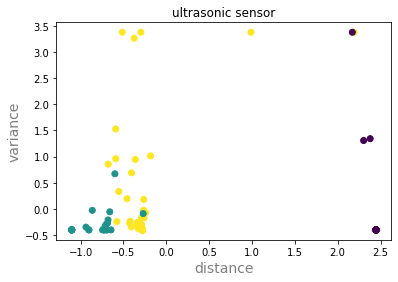

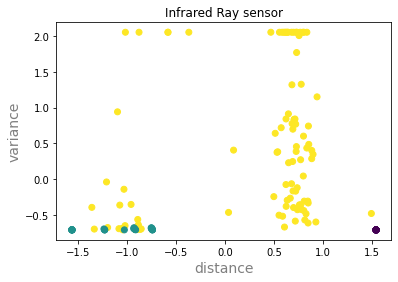

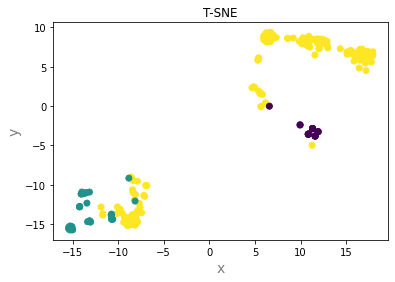

In [8]:
# print (train_data)
scatter(train_data[:,0],train_data[:,2], c=train_label)
title("ultrasonic sensor")
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)
figure()
title("Infrared Ray sensor")
scatter(train_data[:,1],train_data[:,3], c=train_label)
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)


fig = figure()
title("T-SNE")
scatter(data_tsne[:,0],data_tsne[:,1], c=label)
plt.xlabel('x',fontsize=14,alpha=0.5)
plt.ylabel('y',fontsize=14,alpha=0.5)

## KMeans

In [9]:
dat_list = []
tsne_dat_list = []
lab_list = []
for c in [0,1,2]:
    temp_data = train_data[train_label==c]
    tsne_temp_data = tsne_train_data[train_label==c]
    k = int(len(temp_data)//5)
    Kmeans_classifier = KMeans(n_clusters=k,random_state=5)
    Kmeans_classifier.fit(temp_data)
    dat_list.extend(Kmeans_classifier.cluster_centers_)
    Kmeans_classifier.fit(tsne_temp_data)
    tsne_dat_list.extend(Kmeans_classifier.cluster_centers_)
    lab_list.extend([int(c)]*k)
train_mean_data = np.array(dat_list)
tsne_train_mean_data = np.array(tsne_dat_list)
train_mean_label = np.array(lab_list)

Text(0, 0.5, 'variance')

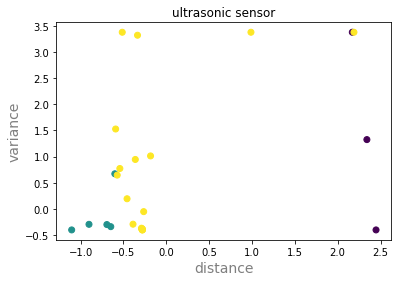

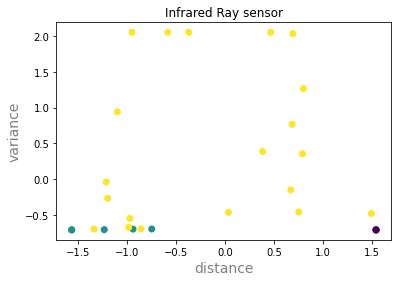

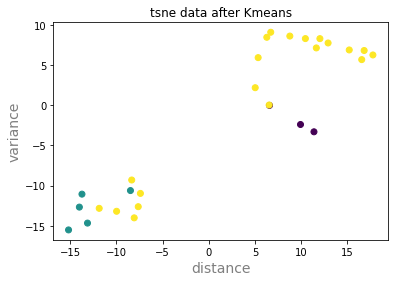

In [10]:
# print (train_data)
scatter(train_mean_data[:,0],train_mean_data[:,2], c=train_mean_label)
title("ultrasonic sensor")
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)
figure()
title("Infrared Ray sensor")
scatter(train_mean_data[:,1],train_mean_data[:,3], c=train_mean_label)
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)
figure()
title("tsne data after Kmeans")
scatter(tsne_train_mean_data[:,0],tsne_train_mean_data[:,1], c=train_mean_label)
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)

## KNN training

In [11]:
print("KNN accuracy after Kmeans")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(train_mean_data,train_mean_label)
    print("{}_neighbor score: {} ".format(n,classifier.score(test_data,test_label)))
print("\nKNN accuracy after T-SNE")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(tsne_train_data,train_label)
    print("{}_neighbor score: {}".format(n,classifier.score(tsne_test_data,test_label)))
print("\nKNN accuracy after T-SNE and Kmeans")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(tsne_train_mean_data,train_mean_label)
    print("{}_neighbor score: {}".format(n,classifier.score(tsne_test_data,test_label)))


KNN accuracy after Kmeans
1_neighbor score: 0.7659574468085106 
2_neighbor score: 0.5957446808510638 
3_neighbor score: 0.7872340425531915 
4_neighbor score: 0.5957446808510638 
5_neighbor score: 0.5106382978723404 

KNN accuracy after T-SNE
1_neighbor score: 0.7872340425531915
2_neighbor score: 0.6808510638297872
3_neighbor score: 0.8085106382978723
4_neighbor score: 0.7659574468085106
5_neighbor score: 0.7659574468085106

KNN accuracy after T-SNE and Kmeans
1_neighbor score: 0.7659574468085106
2_neighbor score: 0.6808510638297872
3_neighbor score: 0.8085106382978723
4_neighbor score: 0.7021276595744681
5_neighbor score: 0.7659574468085106
